<a href="https://colab.research.google.com/github/enesertas/computer_vision_step_by_step/blob/main/improved_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import cifar10

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 14s 0us/step


In [3]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

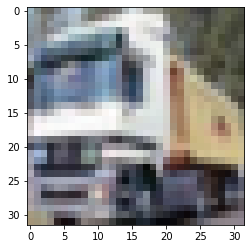

In [4]:
plt.imshow(X_train[1])

We need to add Data Augmentation and Batch Normalization to improve our results.

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
X_train = X_train/255
X_test = X_test/255
y_test = y_test.flatten()
y_train = y_train.flatten()

In [7]:
batch_size=32
steps_per_epoch = X_train.shape[0] // batch_size
image_gen = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.10,
    height_shift_range = 0.10,
    shear_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

train_generator = image_gen.flow(X_train, y_train, batch_size)

In [8]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, BatchNormalization, Input, MaxPool2D

In [12]:
model = Sequential()

i = Input(X_train[0].shape)

# First Convolutional Block

x = Conv2D(32, (3,3), padding='same', activation='relu')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)

x = MaxPool2D((2,2))(x)

# Second Convolutional Block

x = Conv2D(64, (3,3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)

x = MaxPool2D((2,2))(x)

# Third Convolutional Block

x = Conv2D(128, (3,3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)

x = MaxPool2D((2,2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

x = Dense(10, activation = 'softmax')(x)

model = Model(i, x)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0     

In [13]:
r = model.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=50, validation_data=(X_test, y_test), )

Epoch 1/50
1562/1562 [==============================] - 32s 20ms/step - loss: 1.4979 - accuracy: 0.4763 - val_loss: 1.2299 - val_accuracy: 0.5728
Epoch 2/50
1562/1562 [==============================] - 30s 19ms/step - loss: 1.0882 - accuracy: 0.6196 - val_loss: 0.9448 - val_accuracy: 0.6730
Epoch 3/50
1562/1562 [==============================] - 30s 19ms/step - loss: 0.9379 - accuracy: 0.6754 - val_loss: 0.8495 - val_accuracy: 0.7120
Epoch 4/50
1562/1562 [==============================] - 30s 19ms/step - loss: 0.8455 - accuracy: 0.7084 - val_loss: 0.7347 - val_accuracy: 0.7475
Epoch 5/50
1562/1562 [==============================] - 31s 20ms/step - loss: 0.7785 - accuracy: 0.7314 - val_loss: 0.6247 - val_accuracy: 0.7875
Epoch 6/50
1562/1562 [==============================] - 30s 19ms/step - loss: 0.7299 - accuracy: 0.7525 - val_loss: 0.7753 - val_accuracy: 0.7512
Epoch 7/50
1562/1562 [==============================] - 30s 19ms/step - loss: 0.6809 - accuracy: 0.7682 - val_loss: 0.7335 -

Text(0.5, 1.0, 'Model Loss')

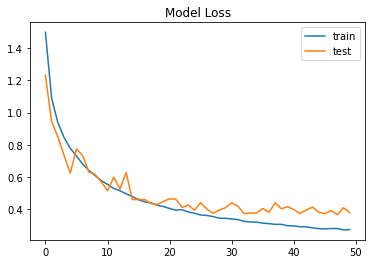

In [24]:
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.legend(['train', 'test'])
plt.title('Model Loss')

Text(0.5, 1.0, 'Model Accuracy')

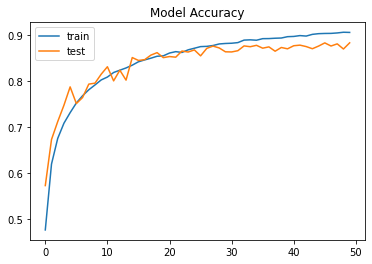

In [25]:
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.legend(['train', 'test'])
plt.title('Model Accuracy')

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
predictions = np.argmax(model.predict(X_test), axis=1)

In [30]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1000
           1       0.90      0.97      0.94      1000
           2       0.85      0.84      0.85      1000
           3       0.84      0.71      0.77      1000
           4       0.90      0.84      0.87      1000
           5       0.86      0.82      0.84      1000
           6       0.87      0.95      0.91      1000
           7       0.92      0.92      0.92      1000
           8       0.94      0.92      0.93      1000
           9       0.88      0.94      0.91      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



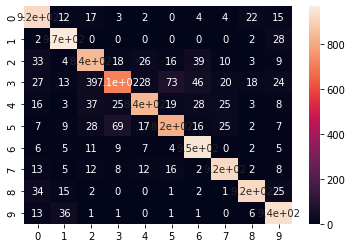

In [32]:
conf_matr = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matr, annot=True,)

airplane										
automobile										
bird										
cat										
deer										
dog										
frog										
horse										
ship										
truck										

We've managed to increase our previous accuracy of 0.72 to 0.88 using Data Augmentation and Batch Normalization.